# Tutorial 4: Cobweb plots

## Part 1: On the board ##

**This part will be explained on the board**

The usual recursion equation 
$$ N\left(t+1\right) = f\left\lbrack N\left(t\right)\, \right] $$
Gives us a function $f$ that tesll us the next value of $N\left(t+1\right)$ from the current $N\left(t\right)$.

A cobweb plot is a way to visualize this process.  
$~$  
The main information we have is the function $f$, so We begin by graphing it in the standard way 
$y=f\left(x\right)$

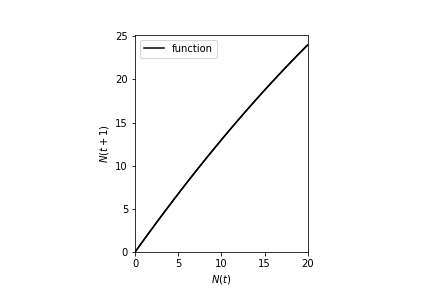

Notice that the axes are $N\left(t\right)$ as input on the x axis, and the next value $N\left(t+1\right)$ is the output on the y axis.  

We start at some point $N\left(0\right)$ on the x axis. By drawing a line up, We can tell from the graph of $f$ what is $N\left(1\right)$

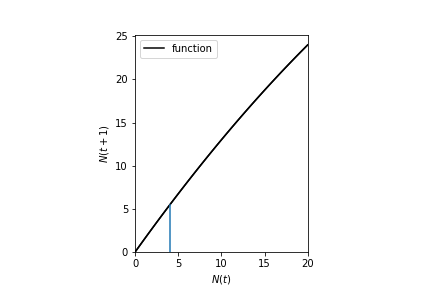

Now we have $N\left(1\right)$, we want to find $N\left(2\right)$: we find the value of $N\left(1\right)$ on the $x$ axis

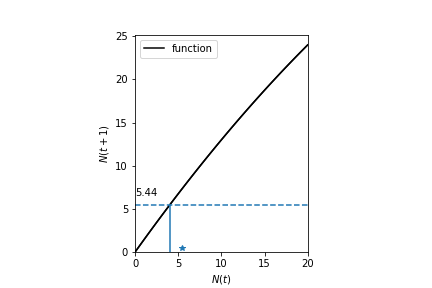

And get $N\left(2\right)$ from the function.

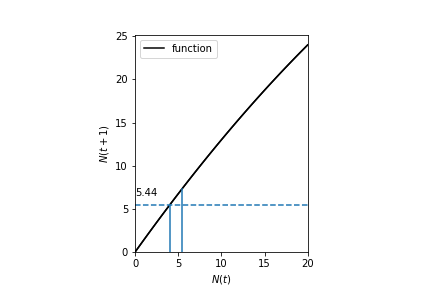

We can repeat this more times to get $N\left(t\right)$

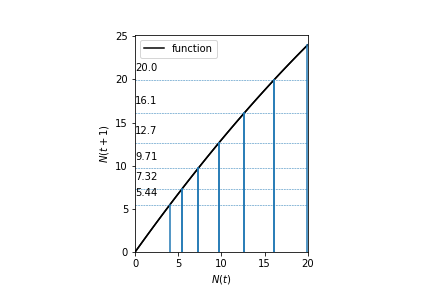

We can make this more ergonomic: We can draw the line $y=x$, then, After finding the new value in the $y$ axis by drawing a vertical line, we can find the correct position in the $x$ axis by drawing a line horizontally $y=x$, Instead of searching for the value on the $x$ axis.

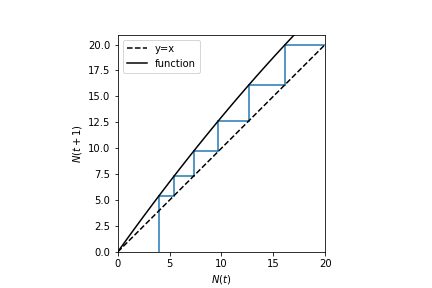

Now the recursion process is more obvious:  
We move vertically to the function graph to update the value from $N\left(t\right)$ to $N\left(t+1\right)$, and we move horizontaly to update the time from $t$ to $t+1$

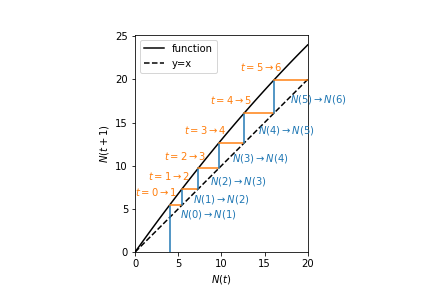

Let's demonstrate the exponential and logistic model for population growth:  
Exponential

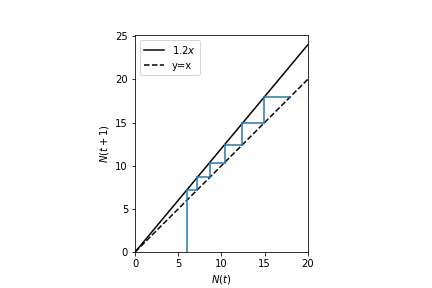

Exponential with out-migration:

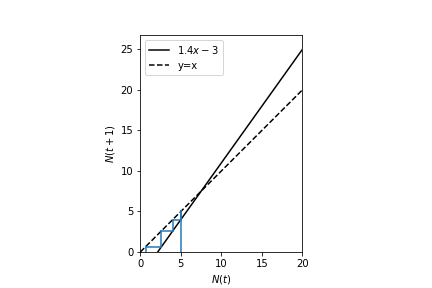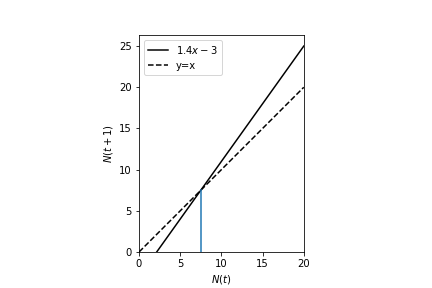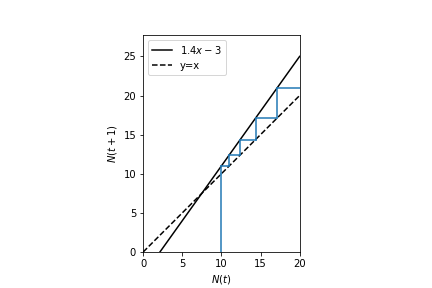

We have an unstable fixed point: at $7.5$ the population stays $7.5$, but even a little below will cause extinction and even a little above will cause endless growth

Logistic growth

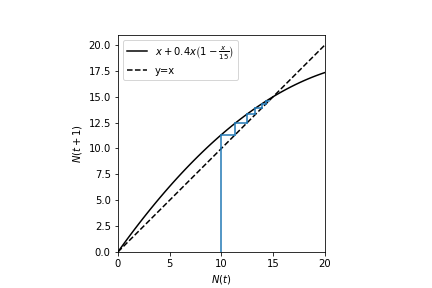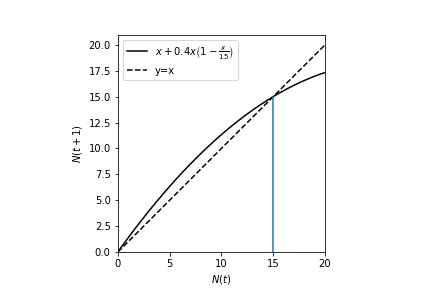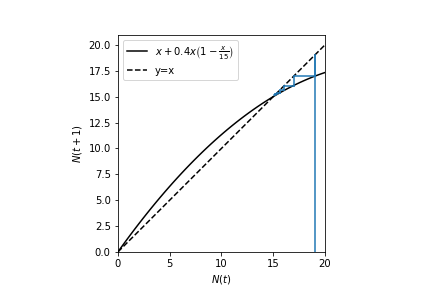

In this case, we have a stable fixed point at the carrying capacity $15$: population below the carrying capacity will increase, population at the carrying capacity will stay, and population above the carrying capacity will be reduced.

We can understand the stability of a point by zooming in near it: As long as the function is nice enough, it will look similar to a line with a slope $\frac{df}{dn}$.Then the stability is obvious from what we've seen so far: if the line is below $45^\circ$ i.e. $\frac{df}{dn}<1$, the point is stable, and if the line is above $45^\circ$ i.e. $\frac{df}{dn}<1$, the point is unstable

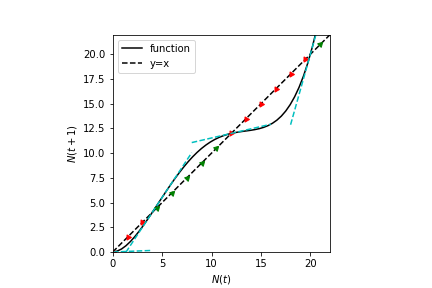

## Part 2: Numerical ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Last time we showed how to use python to solve a recurrence equation:

In [2]:
N=5 # start at N(0)

In [3]:
# Ctrl-Enter this cell
N = 2*N + 1
print(f'{N:_}')

11


We (tried) to solve a general recursion equation.  
$$ Y\left(t+1\right) = F\left\lbrack\, t,Y\left(t\right)\, \right] $$  
Instead of hardcoding everything, we were trying to make a function, a *tool*, that can solve any recurrence relation.

Here is a slightly more advanced function.

In [4]:
def solve_recursion(f: callable, t_span: (int, int)=(0,1), y0: np.array or float=1)->np.array:
    """Solve the recurrence y(t+1)=f(t,y(t)) in t_span=(t0,tf) starting at y(t0)=y0. Return solution array y[0:tf-t0+1,...]."""
    y0 = np.array(y0)
    t0, tf = t_span

    t = np.arange(t0, tf+1)
    y = np.zeros((len(t), *y0.shape))
    y[0,...]=y0

    for i in range(len(t)-1):
        y[i+1,...] = f(t[i,...],y[i,...])
    return y

This takes a function of two parameters, time and the variable `f(t,y)`, a timespan as a tuple of initial and final time `t_span`, and an initial value `y0`.  

Let's redo what we had last time
1.  Use this function to solve the logistic equation
    $$ N\left(t+1\right) = N\left(t\right) + r N\left(t\right)\left(1-\frac{N\left(t\right)}{k}\right) $$
    with $r=0.2,k=400,N(0)=40$ from $t=0$ to $t=50 $, and plot it

In [5]:
# solution here

#### spoiler ####

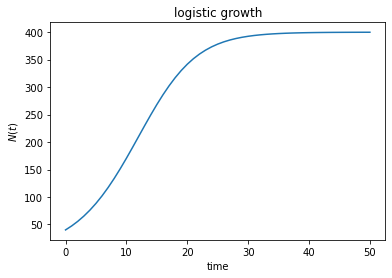

In [6]:
N = solve_recursion(lambda t,y: y + 0.2*y*(1-y/400), t_span=(0,50), y0=40)
plt.plot(N)
plt.xlabel('time')
plt.ylabel(r'$N\left(t\right)$')
plt.title('logistic growth')
plt.show()

## cobweb plots ##

1. plot the cobweb graph for the exponential population growth with $r=0.1,N\left(0\right)=200$ for 15 generations $N\left(15\right)$
2. plot the cobweb graph for the exponential population growth with $r=-0.1,N\left(0\right)=200$ for 15 generations $N\left(15\right)$
3. plot the cobweb graph for the logistic population growth with $r=0.4,k=2000,N\left(0\right)=200$ for 20 generations $N\left(20\right)$
4. plot the cobweb graph for the logistic population growth with $r=0.4,k=150,N\left(0\right)=200$ for 20 generations $N\left(20\right)$
5. plot the cobweb graph for the logistic population growth with $r=1.8,k=2000,N\left(0\right)=200$ for 20 generations $N\left(20\right)$
 
Notice: what happens to the population after a long time? How do $r$ and $k$ effect the population growth? What happens when $N=k$? What happens when $N<k$ compare to $N>k$?

### Solution ###

Let's first tackle the first case (or two)

1. plot the cobweb graph for the exponential population growth with $r=0.1,N\left(0\right)=200$

When we plotted the graph, we had this kind of lines:  

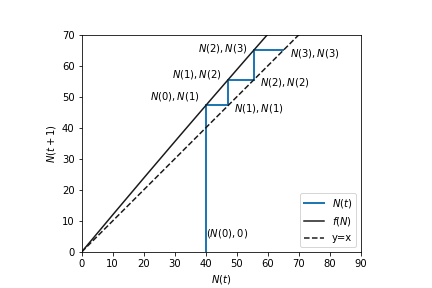

If we want to draw this, we need to solve this recurrence relation (for 15 generations) using the new `solve_recursion` function.  
Note the inputs: a function of two variable `f(t,y)`. Save the solution in a variable N.

In [7]:
# your code here

#### Spoiler ####

In [8]:
def exponential_growth(t,n):
    """exponential growth with r=0.1.
    
    solve_recursion wants a function of both time and the variable
    """
    r=0.1
    return n+r*n

f=exponential_growth # we can assign functions to a variable just like integers, floats, and lists.
print('The value of the function f(0,1) is ', f(0,1))

N = solve_recursion(exponential_growth, t_span=(0,15), y0=200)
print("our solution N=",N)

The value of the function f(0,1) is  1.1
our solution N= [200.         220.         242.         266.2        292.82
 322.102      354.3122     389.74342    428.717762   471.5895382
 518.74849202 570.62334122 627.68567534 690.45424288 759.49966717
 835.44963388]


#### #### 
<a id='make_N'></a>
Now that we have `N`, we can start by plotting the cobweb line:  
We want to use `plt.plot(x,y)` to plot this line, what should be `x` and `y`?

In [9]:
# your code here

#### Spoiler ####

Our points are  

$$
\begin{pmatrix}
 N\left(0\right) \\ 0
\end{pmatrix},
\begin{pmatrix}
 N\left(0\right) \\ N\left(1\right)
\end{pmatrix},
\begin{pmatrix}
 N\left(1\right) \\ N\left(1\right)
\end{pmatrix},
\begin{pmatrix}
 N\left(1\right) \\ N\left(2\right)
\end{pmatrix},
\begin{pmatrix}
 N\left(2\right) \\ N\left(2\right)
\end{pmatrix},
\ldots,
\begin{pmatrix}
 N\left(19\right) \\ N\left(20\right)
\end{pmatrix},
\begin{pmatrix}
 N\left(20\right) \\ N\left(20\right)
\end{pmatrix}
$$

So the x is  
`x=N[0],N[0],N[1],N[1],...N[19],N[20]`  
While the y is  
`y==0,N[1],N[1],N[2],...N[20],N[20]`  
We can derive them from `N` using some basic (but confusing) indexing:  
* `x` is made of two copies of each entry in N, except the last. This means it is length `2*len(N)-1`
* `y` is made of `0` in the 0th index, a copy of `N[1:]` in the odd indices, and another copy of `N[1:]` in the even indices

In [10]:
x = np.zeros(2*len(N)-1)
y = np.zeros(2*len(N)-1)
x[::2] = N # first copy, point on the y=x line
x[1::2] = N[:-1] # second copy minus the end, points on the y=f(x) line

y[0]=0 # first point
y[1::2] = N[1:] # first copy, point on the y=f(x) line
y[2::2] = N[1:] # second copy, points on the y=x line

#### #### 
Lets plot and see what we got so far

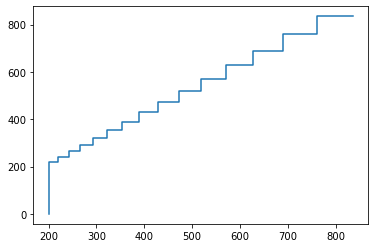

In [11]:
plt.plot(x,y)
plt.show()

Now we just need the rest of the visualization to make sense of this line  
(It won't be as easy in more advanced cases)  

We want to add the dashed line $y=x$, which in theory goes infinitly far in both direction.  
Plot the line above with a dashed line of $y=x$  
hint: Look at <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axline.html">plt.axline</a> and the example at the bottom

In [12]:
# axline

#### Spoiler ####

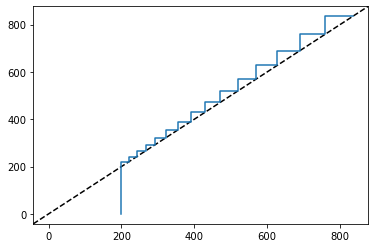

In [13]:
plt.axline( (0,0),(1,1), linestyle='--',color='k')
plt.plot(x,y) # cobweb line we already made
plt.show()

#### #### 
Now let's add the function $y=f(x)$.  
The function we gave to `solve_recursion` was of two parameters, `f(t,y)`, but it shouldn't depend on `t`, only on `y`.  
We want to plot this function `plt.plot(x_func, y_func)`: what should be `x_func` and `y_func` that display this function in the figure? 

In [14]:
# your code here

#### Spoiler ####

We want to draw the function *across the entire plane of the figure*.
Our range of `x` is the x axis, which we can get using `plt.xlim()`.  
Note matplotlib automatically change these limits when we create and change the plot, so 
* we must create `x_func` from the limits *after* we plot the cobweb line and the y=x line  
* we must restore the original x limits after we plot the new line  

we can use `plt.linspace` to generate the `x_func`, then plug into the function.  
Note that we need some `t`, even though we don't use it

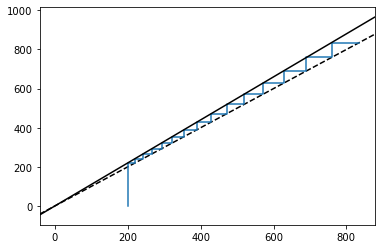

In [15]:
plt.axline( (0,0),(1,1), linestyle='--',color='k') # y=x
plt.plot(x,y) # cobweb

x_min, x_max = plt.xlim()
x_func = np.linspace(x_min, x_max)
y_func = exponential_growth(0, x_func) # function
plt.plot(x_func,y_func,'k')
plt.xlim(x_min,x_max)

plt.show()

#### #### 
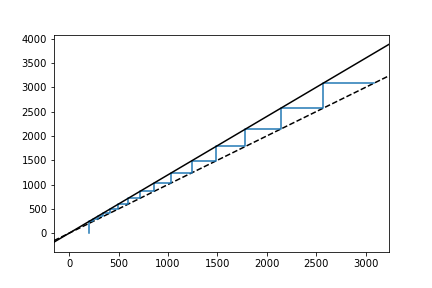  

<a id='plot_cobweb_final'></a>
We have a functional cobweb plot, but we need some more work to make it a good plot:  
* we want to label the axes $N\left(t\right)$ and $N\left(t+1\right)$  
* we want a title for the graph "Exponential growth with $r=0.1$"  
* we want a legend to tell us what each line is: we don't want to confuse the lines!  
It is also a good point to check if the line format is correct: are the style and colors right?
* The x and y axis both represent the variable $N$, but matplotlib stretches the scale of the axes. Note how the $y=x$ line is not $45^\circ$!. We want to re-scale both axes to be the same.
* $N$ cannot be negative, so we want the x and y limit to be positive.  


In [16]:
# very tricky. so let's just look at the spoiler

#### Spoiler ####

To add a legend, we give each plotting function a `label=` keyword argument, then at the end call `plt.legend`.  
We fix the axes using `plt.axis('scaled')`  
To fix the plot to the positive quadrant, we need to "clamp" the x and y limit to be 0 if they are negative.

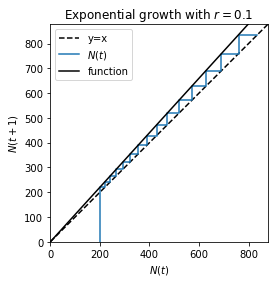

In [17]:
plt.axline( (0,0),(1,1), linestyle='--',color='k',label='y=x') # y=x
plt.plot(x,y, label=r'$N\left(t\right)$') # cobweb

plt.axis('scaled')

# clamp the limits
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_min = max(x_min,0)  # also known as the rectified linear function
y_min = max(y_min,0)  # or ReLu

x_func = np.linspace(x_min, x_max)
y_func = f(0, x_func) # function
plt.plot(x_func,y_func,'k',label='function')

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.xlabel(r'$N\left(t\right)$')
plt.ylabel(r'$N\left(t+1\right)$')
plt.title(r"Exponential growth with $r=0.1$")
plt.legend()
plt.show()

#### ####  
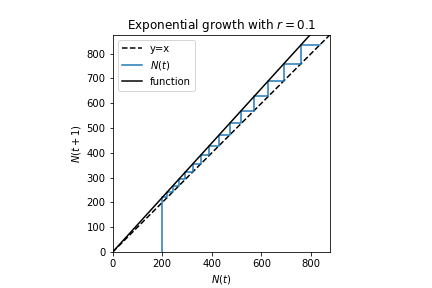  
Now we have a great looking plot! Just do it four more times.  

Or not: In programming we have the DRY principle: Don't Repeat Yourself!  
Whenever we feel like copy-pasting our own code, we should consider packing code into more general functions, iterations, and classes.  
The goal is not just to get shorter code, but to organize our ideas in a coherent manner: instead of listing many many disjoint steps  
```python
create x
create y
plot x,y
create x_func
create y_func
plot x_func,y_func
create x2
create y2
...
plot x_func6,y_func6
```  
We organize "ploting a specific graph" into a function:
```python
def plot_thing():
    create x
    ...
    plot x_func, y_func
    
plot_thing(1)
plot_thing(2)
plot_thing(3)
...
plot_thing(6)
```

This type of code has several advantages:
* We separate *how to plot thing* into the function, so the rest of the code is purely *what we want to plot*.
* We reduce the possibility of making a mistake: we only need to get the plotting right once inside the function
* It is easy to change and improve the code: fixes in the function cascades to all the uses.
* The code is shorter

However, exactly what to separate into a function is a difficult question, and is almost wholy dependant on context. Do we want a function that just spits out a complete figure, or do we want to plot several cobweb plots in the same figure? Do we have fixed title, or do we want to be able to change it?.  

#### ####
Let's move the code ([here](#make_N) and [here](#plot_cobweb_final)) into a new function `plot_cobweb`. rememeber we need to answer  
> 1. plot the cobweb graph for the exponential population growth with $r=0.1,N\left(0\right)=200$ for 15 generations $N\left(15\right)$
> 2. plot the cobweb graph for the exponential population growth with $r=-0.1,N\left(0\right)=200$ for 15 generations $N\left(15\right)$
> 3. plot the cobweb graph for the logistic population growth with $r=0.4,k=2000,N\left(0\right)=200$ for 20 generations $N\left(20\right)$
> 4. plot the cobweb graph for the logistic population growth with $r=0.4,k=150, N\left(0\right)=200$ for 20 generations $N\left(20\right)$
> 5. plot the cobweb graph for the logistic population growth with $r=1.8,k=2000,N\left(0\right)=200$ for 20 generations $N\left(20\right)$

In [18]:
def plot_cobweb(N, f):
    # copy paste our code 
    # getting x and y from N
    # and plotting cobweb from N
    ... # tweak so it works on the cells below


To use on

In [19]:
f = lambda t,n: (1+0.1)*n
N = solve_recursion(f,(0,20),200)
plot_cobweb(N, f)
plt.show()

In [20]:
f = lambda t,n: (1-0.1)*n
N = solve_recursion(f,(0,20),200)
plot_cobweb(N, f)
plt.show()

In [21]:
# 3 fill yourself!

In [22]:
# 4 fill yourself!

In [23]:
# 5 fill yourself!

#### spoiler ####

In [24]:
def plot_cobweb(N, f):
    x = np.zeros(2*len(N)-1)
    y = np.zeros(2*len(N)-1)
    x[::2] = N
    x[1::2] = N[:-1]
    y[1::2] = N[1:]
    y[2::2] = N[1:]
    plt.axline( (0,0),(1,1), linestyle='--',color='k',label='yx') # y=x
    plt.plot(x,y, label=r'$N\left(t\right)$') # cobweb
    plt.axis('scaled')

    # clamp the limits
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    x_min = max(x_min,0)
    y_min = max(y_min,0)

    x_func = np.linspace(x_min, x_max)
    y_func = f(0, x_func)
    plt.plot(x_func,y_func,'k',label='function')

    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)

    plt.xlabel(r'$N\left(t\right)$')
    plt.ylabel(r'$N\left(t+1\right)$')
    # plt.title(r"Exponential growth with $r=0.1$") # depends on f!
    plt.legend()


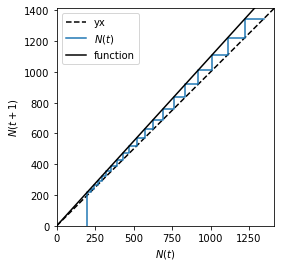

In [25]:
f = lambda t,n: (1+0.1)*n
N = solve_recursion(f,(0,20),200)
plot_cobweb(N, f)
plt.show()

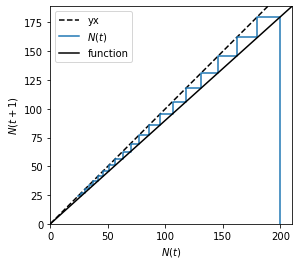

In [26]:
f = lambda t,n: (1-0.1)*n
N = solve_recursion(f,(0,20),200)
plot_cobweb(N, f)
plt.show()

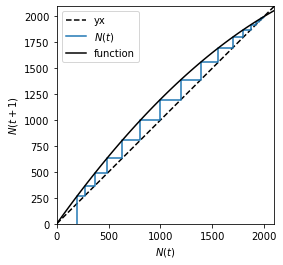

In [27]:
f = lambda t,n: n + 0.4*n*(1-n/2000)
N = solve_recursion(f,(0,20),200)
plot_cobweb(N, f)
plt.show()

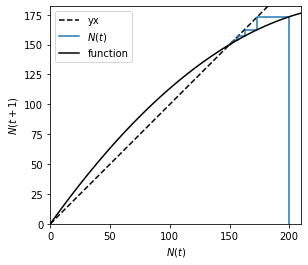

In [28]:
f = lambda t,n: n + 0.4*n*(1-n/150)
N = solve_recursion(f,(0,20),200)
plot_cobweb(N, f)
plt.show()

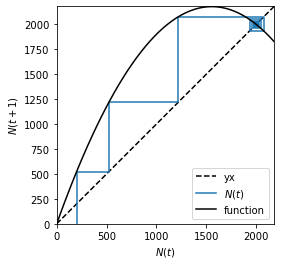

In [29]:
f = lambda t,n: n + 1.8*n*(1-n/2000)
N = solve_recursion(f,(0,20),200)
plot_cobweb(N, f)
plt.show()